In [1]:
import pandas as pd
import numpy  as np

In [2]:
from main import Problem3Experiment
df = Problem3Experiment()



FACES Dataset ---

10% of faces - binary PERCEPTRON:
train_time=0.75ms, time_std=0.02  avg_accuracy=54.67% std=7.77

10% of faces - binary NAIVE BAYES:
train_time=0.45ms, time_std=0.01  avg_accuracy=60.0% std=0.0

10% of faces - binary NEURAL NETWORK:
train_time=3.48ms, time_std=0.03  avg_accuracy=52.0% std=7.77



20% of faces - binary PERCEPTRON:
train_time=1.13ms, time_std=0.05  avg_accuracy=64.0% std=11.23

20% of faces - binary NAIVE BAYES:
train_time=0.95ms, time_std=0.03  avg_accuracy=70.0% std=0.0

20% of faces - binary NEURAL NETWORK:
train_time=6.77ms, time_std=0.04  avg_accuracy=53.33% std=12.11



30% of faces - binary PERCEPTRON:
train_time=1.82ms, time_std=0.02  avg_accuracy=60.89% std=3.33

30% of faces - binary NAIVE BAYES:
train_time=1.54ms, time_std=0.03  avg_accuracy=82.22% std=0.0

30% of faces - binary NEURAL NETWORK:
train_time=9.95ms, time_std=0.02  avg_accuracy=62.22% std=8.66



40% of faces - binary PERCEPTRON:
train_time=2.32ms, time_std=0.04  avg_accuracy=

In [3]:
df.head()

,Dataset,Model,Percent,Trial,Accuracy,Time
0,0,0,10,0,46.666667,0.9153
1,0,0,10,1,66.666667,1.1212
2,0,0,10,2,53.333333,0.4409
3,0,0,10,3,60.000000,0.6936
4,0,0,10,4,46.666667,0.5698


In [4]:
ag = df.groupby(['Dataset', 'Model', 'Percent']).agg(
    
    acc_avg = pd.NamedAgg(column="Accuracy", aggfunc="mean"),
    
    acc_std = pd.NamedAgg(column="Accuracy", aggfunc="std"),
    
    time_avg = pd.NamedAgg(column="Time", aggfunc="mean"),
    
    time_std = pd.NamedAgg(column="Time", aggfunc="std")
    
).reset_index()

ag.head()

,Dataset,Model,Percent,acc_avg,acc_std,time_avg,time_std
0,0,0,10,54.666667,8.692270,0.74816,0.272164
1,0,0,20,64.000000,12.560962,1.12664,0.512076
2,0,0,30,60.888889,3.718489,1.81806,0.225273
3,0,0,40,66.666667,4.249183,2.32020,0.397395
4,0,0,50,78.400000,7.854227,2.52582,0.573980


In [5]:
face_df = ag.loc[ag["Dataset"] == 0].drop(['Dataset'], axis=1)
mnist_df = ag.loc[ag["Dataset"] == 1].drop(['Dataset'], axis=1)

In [6]:
bl = "tab:blue"
rd = "crimson"
gn = "green"

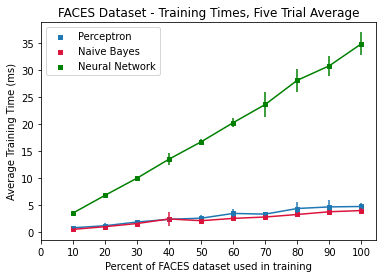

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(face_df.loc[face_df["Model"] == 0, 'Percent'], face_df.loc[face_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(face_df.loc[face_df["Model"] == 0, 'Percent'], 
             face_df.loc[face_df["Model"] == 0, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(face_df.loc[face_df["Model"] == 1, 'Percent'], face_df.loc[face_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(face_df.loc[face_df["Model"] == 1, 'Percent'], 
             face_df.loc[face_df["Model"] == 1, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 1, 'time_std'], c=rd)

plt.scatter(face_df.loc[face_df["Model"] == 2, 'Percent'], face_df.loc[face_df["Model"] == 2, 'time_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(face_df.loc[face_df["Model"] == 2, 'Percent'], 
             face_df.loc[face_df["Model"] == 2, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 2, 'time_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("FACES Dataset - Training Times, Five Trial Average")
plt.xlabel("Percent of FACES dataset used in training")
plt.ylabel("Average Training Time (ms)")
plt.show()

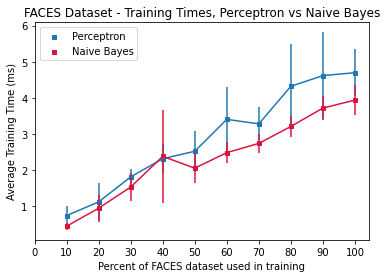

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()


plt.scatter(face_df.loc[face_df["Model"] == 0, 'Percent'], face_df.loc[face_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(face_df.loc[face_df["Model"] == 0, 'Percent'], 
             face_df.loc[face_df["Model"] == 0, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(face_df.loc[face_df["Model"] == 1, 'Percent'], face_df.loc[face_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(face_df.loc[face_df["Model"] == 1, 'Percent'], 
             face_df.loc[face_df["Model"] == 1, 'time_avg'],
             yerr=face_df.loc[face_df["Model"] == 1, 'time_std'], c=rd)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("FACES Dataset - Training Times, Perceptron vs Naive Bayes")
plt.xlabel("Percent of FACES dataset used in training")
plt.ylabel("Average Training Time (ms)")
plt.show()

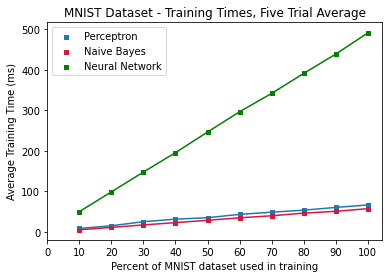

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 1, 'time_std'], c=rd)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], mnist_df.loc[mnist_df["Model"] == 2, 'time_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 2, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 2, 'time_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("MNIST Dataset - Training Times, Five Trial Average")
plt.xlabel("Percent of MNIST dataset used in training")
plt.ylabel("Average Training Time (ms)")
plt.show()

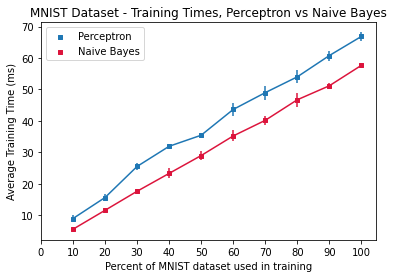

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()


plt.scatter(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 0, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 0, 'time_std'], c=bl)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 1, 'time_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 1, 'time_std'], c=rd)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(loc='upper left');
plt.title("MNIST Dataset - Training Times, Perceptron vs Naive Bayes")
plt.xlabel("Percent of MNIST dataset used in training")
plt.ylabel("Average Training Time (ms)")
plt.show()

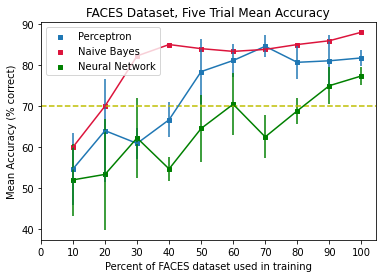

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(face_df.loc[face_df["Model"] == 0, 'Percent'], face_df.loc[face_df["Model"] == 0, 'acc_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(face_df.loc[face_df["Model"] == 0, 'Percent'], 
             face_df.loc[face_df["Model"] == 0, 'acc_avg'],
             yerr=face_df.loc[face_df["Model"] == 0, 'acc_std'], c=bl)

plt.scatter(face_df.loc[face_df["Model"] == 1, 'Percent'], face_df.loc[face_df["Model"] == 1, 'acc_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(face_df.loc[face_df["Model"] == 1, 'Percent'], 
             face_df.loc[face_df["Model"] == 1, 'acc_avg'],
             yerr=face_df.loc[face_df["Model"] == 1, 'acc_std'], c=rd)

plt.scatter(face_df.loc[face_df["Model"] == 2, 'Percent'], face_df.loc[face_df["Model"] == 2, 'acc_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(face_df.loc[face_df["Model"] == 2, 'Percent'], 
             face_df.loc[face_df["Model"] == 2, 'acc_avg'],
             yerr=face_df.loc[face_df["Model"] == 2, 'acc_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.axhline(y = 70, color = 'y', linestyle = 'dashed')

plt.legend(loc='upper left');
plt.title("FACES Dataset, Five Trial Mean Accuracy")
plt.xlabel("Percent of FACES dataset used in training")
plt.ylabel("Mean Accuracy (% correct)")
plt.show()

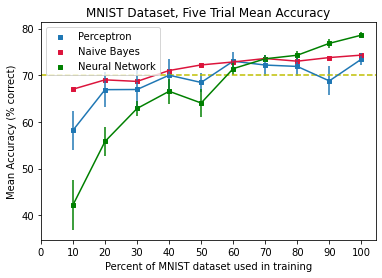

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.scatter(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], mnist_df.loc[mnist_df["Model"] == 0, 'acc_avg'], s=10, c=bl, marker="s", label='Perceptron')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 0, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 0, 'acc_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 0, 'acc_std'], c=bl)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], mnist_df.loc[mnist_df["Model"] == 1, 'acc_avg'], s=10, c=rd, marker="s", label='Naive Bayes')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 1, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 1, 'acc_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 1, 'acc_std'], c=rd)

plt.scatter(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], mnist_df.loc[mnist_df["Model"] == 2, 'acc_avg'], s=10, c=gn, marker="s", label='Neural Network')
plt.errorbar(mnist_df.loc[mnist_df["Model"] == 2, 'Percent'], 
             mnist_df.loc[mnist_df["Model"] == 2, 'acc_avg'],
             yerr=mnist_df.loc[mnist_df["Model"] == 2, 'acc_std'], c=gn)

plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.axhline(y = 70, color = 'y', linestyle = 'dashed')

plt.legend(loc='upper left');
plt.title("MNIST Dataset, Five Trial Mean Accuracy")
plt.xlabel("Percent of MNIST dataset used in training")
plt.ylabel("Mean Accuracy (% correct)")
plt.show()

In [21]:
pd.options.display.max_rows = 1000
df.head(len(df))

,Dataset,Model,Percent,Trial,Accuracy,Time
0,0,0,10,0,46.666667,0.9153
1,0,0,10,1,66.666667,1.1212
2,0,0,10,2,53.333333,0.4409
3,0,0,10,3,60.000000,0.6936
4,0,0,10,4,46.666667,0.5698
5,0,1,10,0,60.000000,0.5431
6,0,1,10,1,60.000000,0.5856
7,0,1,10,2,60.000000,0.3875
8,0,1,10,3,60.000000,0.3798
9,0,1,10,4,60.000000,0.3756


In [22]:
ag.head(len(ag))

,Dataset,Model,Percent,acc_avg,acc_std,time_avg,time_std
0,0,0,10,54.666667,8.692270,0.74816,0.272164
1,0,0,20,64.000000,12.560962,1.12664,0.512076
2,0,0,30,60.888889,3.718489,1.81806,0.225273
3,0,0,40,66.666667,4.249183,2.32020,0.397395
4,0,0,50,78.400000,7.854227,2.52582,0.573980
5,0,0,60,81.111111,3.928371,3.40726,0.885796
6,0,0,70,84.571429,2.727204,3.28302,0.458429
7,0,0,80,80.666667,3.970376,4.32186,1.162440
8,0,0,90,81.037037,6.254765,4.61758,1.197530
9,0,0,100,81.733333,1.977653,4.69688,0.655195
